Ej.1) Genere N = 1000 muestras para definir los siguientes vectores aleatorios.:
1. X = [X1 X2]^T , a partir de dos variables Rayleigh, X1
~ Rayl(3) y X2
 ~ Rayl(2).
2. V = [V1
 V2
]T
 a partir de una transformación de X, tal que V = BX.
3. U = [U1
 U2
]T
, a partir de una transformación de X, tal que U = HX.
Haga el gráfico de dispersión (ej: scatter(x1, x2)) y calcule el coeficiente 𝜌 de correlación
entre las componentes de cada vector.
Defina el límite de los ejes del gráfico con axis([-2 12 0 14]).


Coeficiente de correlación de X1 y X2: 0.014279704350977236
Coeficiente de correlación de V1 y V2: 0.45331774820671306
Coeficiente de correlación de U1 y U2: 0.8474712196402506


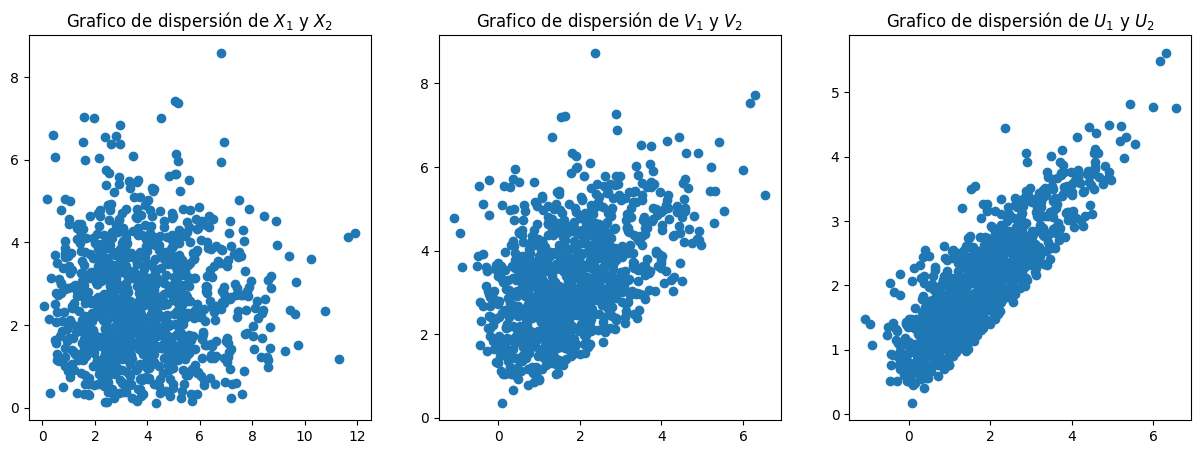

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy 

#Matrices B y H
B = [[0.6, -0.2],[0.4, 0.7]]
H = [[0.6, -0.2],[0.4,0.2]]

N = 1000 #cant muestras           
X1 = np.random.rayleigh(3,N) 
X2 = np.random.rayleigh(2,N)
X_vector = [X1, X2]

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.scatter(X1, X2) #grafico de dispersión
plt.title('Grafico de dispersión de $X_1$ y $X_2$')
p = np.corrcoef(X1,X2)
print(f'Coeficiente de correlación de X1 y X2: {p[0][1]}')

plt.subplot(1,3,2)
V = np.dot(B, X_vector)
plt.scatter(V[0], V[1]) #grafico de dispersión
plt.title('Grafico de dispersión de $V_1$ y $V_2$')
p = np.corrcoef(V[0],V[1])
print(f'Coeficiente de correlación de V1 y V2: {p[0][1]}')

plt.subplot(1,3,3)
U = np.dot(H, X_vector)
plt.scatter(U[0], U[1]) #grafico de dispersión
plt.title('Grafico de dispersión de $U_1$ y $U_2$')
p = np.corrcoef(U[0],U[1])
print(f'Coeficiente de correlación de U1 y U2: {p[0][1]}')









Al comparar los gráficos y los coeficientes de correlación de los tres vectores, se puede decir que las componentes de U son las mas correlacionadas, por lo que la dispersión es más lineal, y las de X son las menos correlacionadas, con un gráfico más disperso, siendo V el caso intermedio. 

Ej2) Estime la matriz de autocovarianza para los vectores aleatorios del ejercicio
anterior: X, U y V.
Analice las propiedades de la matriz y la particularidad de cada una en
relación a los resultados del ejercicio anterior (observe la covarianza entre
componentes y cómo esto se refleja en las matrices de correlación).

In [20]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy 

#Matrices B y H
B = [[0.6, -0.2],[0.4, 0.7]]
H = [[0.6, -0.2],[0.4,0.2]]

N = 1000 #cant muestras           
X1 = np.random.rayleigh(3,N) 
X2 = np.random.rayleigh(2,N)
X = [X1, X2]

V = np.dot(B, X)
U = np.dot(H, X)

C_x = np.cov(X)
print(f'Matriz de covarianzas de X: {C_x}')

C_u = np.cov(U)
print(f'Matriz de covarianzas de U: {C_u}')

C_v = np.cov(V)
print(f'Matriz de covarianzas de V: {C_v}')

Matriz de covarianzas de X: [[3.85732047 0.0977549 ]
 [0.0977549  1.66659964]]
Matriz de covarianzas de U: [[1.43183818 0.86300312]
 [0.86300312 0.69947605]]
Matriz de covarianzas de V: [[1.43183818 0.72566963]
 [0.72566963 1.48854784]]


Las propiedades que podemos inferir en estas matrices, son las de ser simetrica por su definición, siendo la diagonal las varianzas de cada variable aleatoria y los valores que estan fuera de su diagonal ( son diagonalizables) son las covarianzas, esto nos permite ver como es la dispersión de las variables en si y entre ellas. 

Dados dos VeA, X1
 ~ U(0,2) y X2
~ U(0,3) independientes, con N = 1000 realizaciones.
1. Genere muestras de un vector aleatorio Y = [Y1 Y2]^T a partir del vector X = [X1 X2]^T
aplicando una transformación Y = R X, donde R es una matriz de rotación (definida
abajo) considerando un ángulo de rotación 𝜃 = 𝜋/10 Haga un gráfico de dispersión
para X y para Y. Calcule su coeficiente de correlación.
2. Estime la matriz de autocovarianza del vector aleatorio Y.

Coeficiente de correlación de Y1 e Y2 con theta = pi/10 :-0.23733152129045954
Coeficiente de correlación de X1 e X2 :0.00136431429404702
[[ 0.59485099 -0.12087459]
 [-0.12087459  0.80097558]]


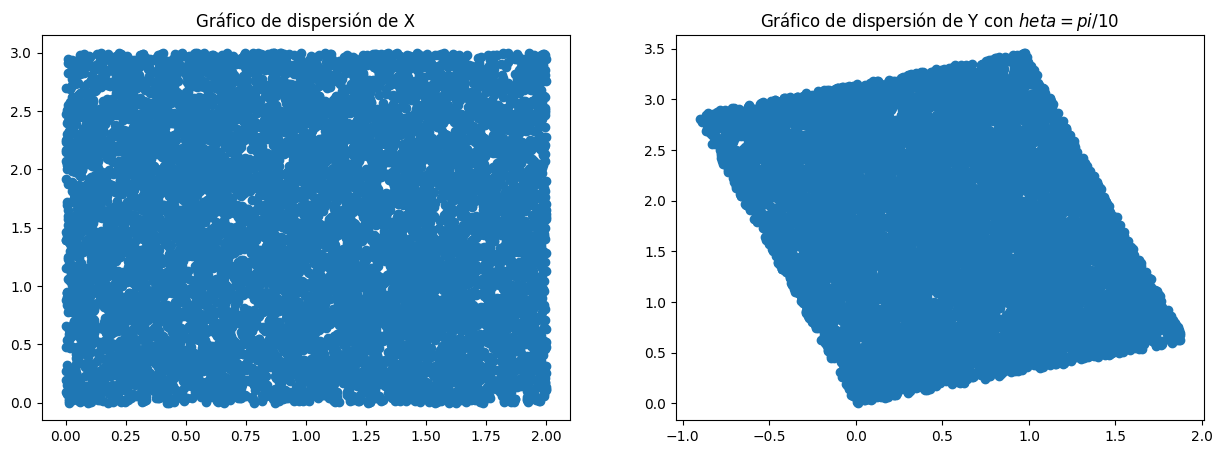

In [59]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy 

N = 10000 #realizaciones
X1 = np.random.uniform(0,2,N) 
X2 = np.random.uniform(0,3,N)
X = np.array([X1, X2])

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X[0], X[1])
plt.title('Gráfico de dispersión de X')

theta1 = np.pi / 10

R1 = [[np.cos(theta1), -np.sin(theta1)],[np.sin(theta1), np.cos(theta1)]] 
Y1 = np.dot(R1,X)

p_Y_1 = np.corrcoef(Y1[0], Y1[1])
print(f'Coeficiente de correlación de Y1 e Y2 con theta = pi/10 :{p_Y_1[0][1]}')

p_X = np.corrcoef(X[0], X[1])
print(f'Coeficiente de correlación de X1 e X2 :{p_X[0][1]}')

plt.subplot(1,2,2)
plt.scatter(Y1[0], Y1[1])
plt.title('Gráfico de dispersión de Y con $\theta = pi / 10$')

media_Y_1 = (1/N)* np.sum(Y1, axis=1)

C_Y_1 = np.zeros((2,2))  #array de 2x2

for i in range(N):
    C_Y_1 += np.outer((X[:,i] - media_Y_1),((X[:,i] - media_Y_1)))
    
C_Y_1 = 1/(N-1) * C_Y_1
print(C_Y_1)

#-----------



#np.linalg.eig(matriz) ---> autovalores / autovectores 

#C_Y = (1/(N-1))*
#print(f'Matriz de covarianzas de X: {C_Y}')

3. Repita los puntos 1 y 2, pero para un ángulo rotación 𝜃 = 𝜋/4.

Coeficiente de correlación de Y1 e Y2 con theta = pi/4:-0.3916394362796736
Coeficiente de correlación de X1 e X2 con theta = pi/4:0.01014436294590301
[[ 2.15044239 -0.35197324]
 [-0.35197324  0.82038596]]


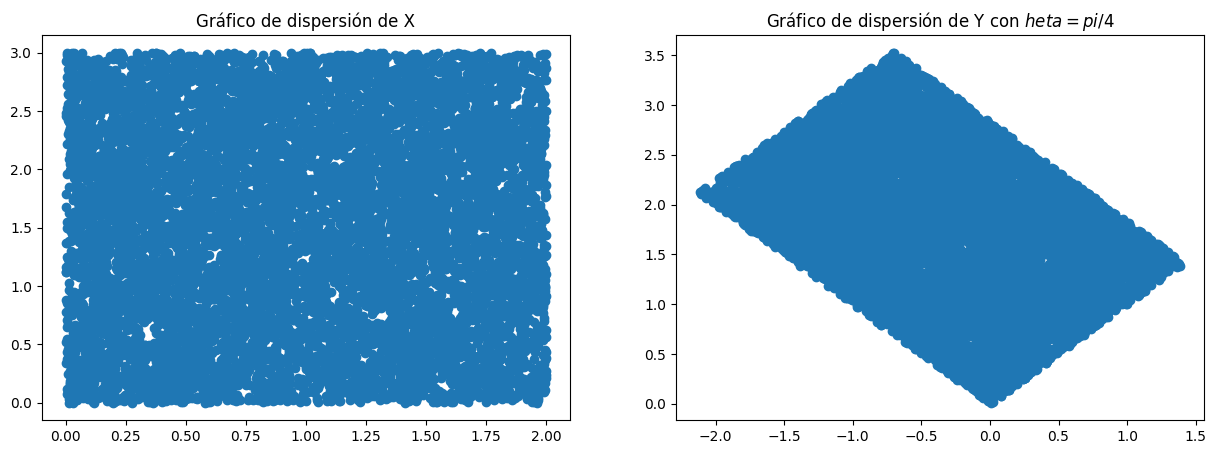

In [60]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy 

N = 10000 #realizaciones
X1 = np.random.uniform(0,2,N) 
X2 = np.random.uniform(0,3,N)
X = np.array([X1, X2])

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X[0], X[1])
plt.title('Gráfico de dispersión de X')

theta2 = np.pi / 4
R2 = [[np.cos(theta2), -np.sin(theta2)],[np.sin(theta2), np.cos(theta2)]] 
Y2 = np.dot(R2,X)

p_Y2 = np.corrcoef(Y2[0], Y2[1])
print(f'Coeficiente de correlación de Y1 e Y2 con theta = pi/4:{p_Y2[0][1]}')

p_X = np.corrcoef(X[0], X[1])
print(f'Coeficiente de correlación de X1 e X2 con theta = pi/4:{p_X[0][1]}')

plt.subplot(1,2,2)
plt.scatter(Y2[0], Y2[1])
plt.title('Gráfico de dispersión de Y con $\theta = pi / 4$')

media_Y_2 = (1/N)* np.sum(Y2, axis=1)

C_Y_2 = np.zeros((2,2))  #array de 2x2

for i in range(N):
    C_Y_2 += np.outer((X[:,i] - media_Y_2),((X[:,i] - media_Y_2)))
    
C_Y_2 = 1/(N-1) * C_Y_2
print(C_Y_2)


agregar conclusion

1. Dado un vector aleatorio normal estándar de ℝ. Hacer un gráfico que
muestre 10 curvas de nivel.
2. Graficar la superficie de la densidad de probabilidad bidimensional.


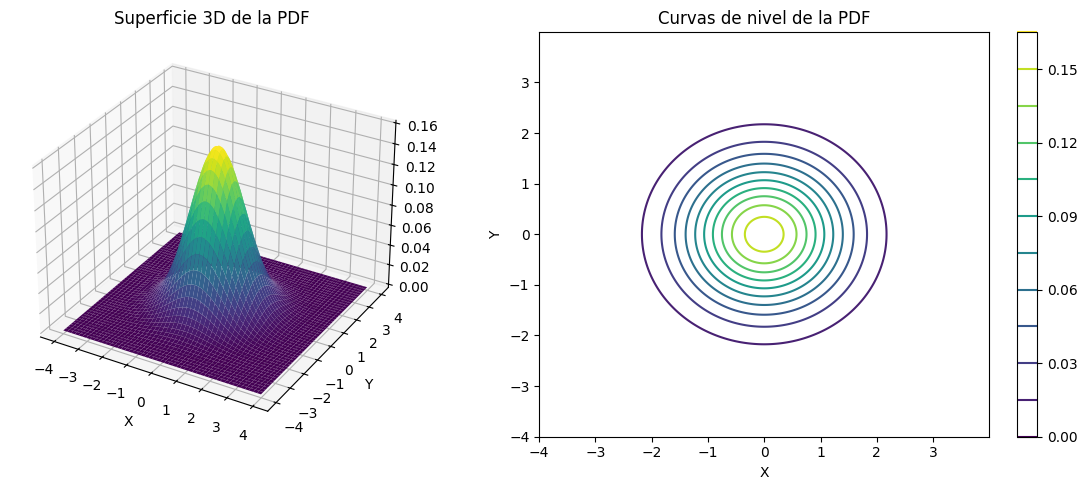

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import multivariate_normal

# Definir los límites sugeridos para X e Y
x, y = np.mgrid[-4:4:.01, -4:4:.01] #genera vectores x e y con valores entre -4 y 4 con paso de 0.1
pos = np.dstack((x, y)) #apila esos vectores de manera q sea una matriz

# Definir la media y la matriz de covarianza del vector normal estándar
mean = [0, 0] #media de la estandar para avector de r2
cov = [[1, 0], [0, 1]]  # Covarianza identidad para ambas variables

# Calcular la densidad de probabilidad
rv = multivariate_normal(mean, cov) #define una normal multivariable con media mean (vector) y covarianza cov (matriz)
z = rv.pdf(pos) #da la funcion de densidad de la multivariable

# Crear la figura
fig = plt.figure(figsize=(12, 5))

# Graficar en 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(x, y, z, cmap='viridis')
ax1.set_title('Superficie 3D de la PDF')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Graficar las curvas de nivel
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(x, y, z, levels=10, cmap='viridis')
ax2.set_title('Curvas de nivel de la PDF')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()





3. Repetir los puntos 1 y 2, pero para un vector aleatorio con la matriz C_X y el vector de medias mean_x
(IMPLEMENTAR FUNCION PDF)

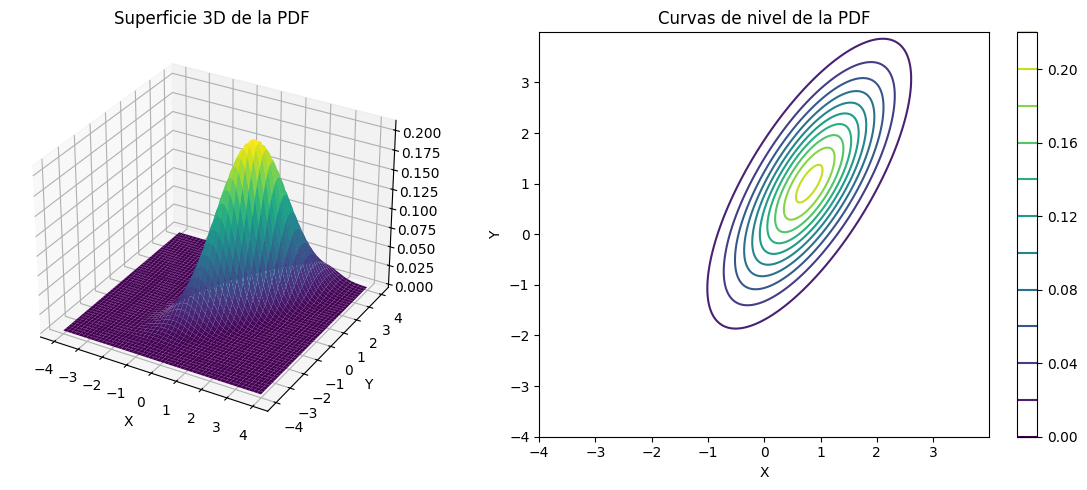

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import multivariate_normal


#Definir los límites para las variables X e Y:
#    - Crear una cuadrícula con valores de X e Y entre -4 y 4 con un paso de 0.01
x, y = np.mgrid[-4:4:.01, -4:4:.01] #genera vectores x e y con valores entre -4 y 4 con paso de 0.1
#    - Apilar X e Y para formar una matriz de posiciones (pos)
pos = np.dstack((x, y)) 

# Definir la media y la matriz de covarianza del vector normal estándar
cov = [[0.7, 0.8],[0.8, 1.75]] #Covarianza
mean = [0.8, 1.0] #Media 

# Calcular la densidad de probabilidad
rv = multivariate_normal(mean, cov) #define una normal multivariable con media mean (vector) y covarianza cov (matriz)
z = rv.pdf(pos) #da la funcion de densidad de la multivariable

# Crear la figura
fig = plt.figure(figsize=(12, 5))


# Graficar en 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(x, y, z, cmap='viridis')
ax1.set_title('Superficie 3D de la PDF')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Graficar las curvas de nivel
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(x, y, z, levels=10, cmap='viridis')
ax2.set_title('Curvas de nivel de la PDF')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()




Como se puede ver entre las diferentes figuras, la variable estandar genera curvas de nivel centradas, lo cual en la superficie podemos ver que esta centrada de una manera correlacionada con el grafico de curvas 2D. En cambio al tener diferentes valores de cov y media, esto genera que la curvas sufran un desvio, de manera que se implementa una rotación de la misma, eso mismo podemos corroborar que pasa con el gráfico en 3D.

Se quiere utilizar una transformación lineal Y = A Z + u que permita convertir un vector aleatorio con
parámetros $C_Z$ y $𝜇_Z$ en otro vector con parámetros $C_Y$ y $𝜇_Y$
(considere los de la actividad anterior).
1. Genere un vector normal estándar de dos componentes Z = [Z1 Z2]^T de 5000 realizaciones con media nula $𝜇_Z$ = 0 y covarianza $C_Z$ = I (identidad). 
Grafique el histograma de cada componente y las curvas de nivel con la dispersión de puntos de Z superpuestas.


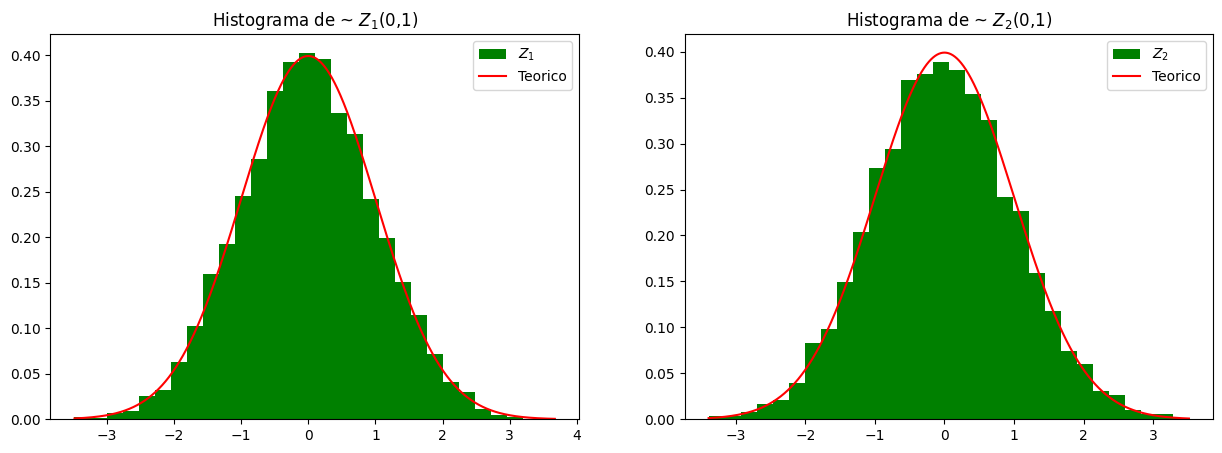

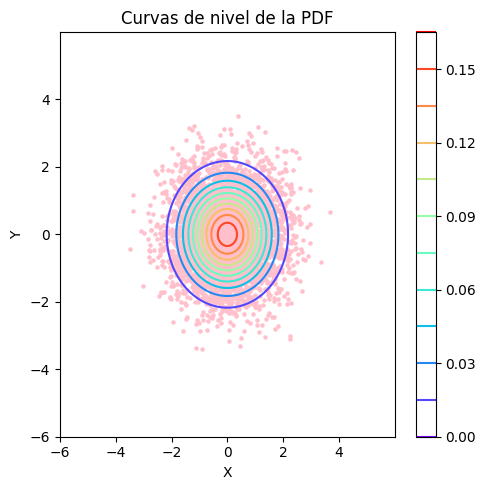

In [131]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import multivariate_normal, norm


N = 5000 #Realizaciones
#    - Crear una cuadrícula con valores de X e Y entre -4 y 4 con un paso de 0.01
x, y = np.mgrid[-6:6:.01, -6:6:.01] #genera vectores x e y con valores entre -4 y 4 con paso de 0.1

Z_1 = np.random.normal(0,1,N)  # Z_1~N(0,1)
Z_2 = np.random.normal(0,1,N) # Z_2~N(0,1)

Z = np.array([Z_1, Z_2]) # Z = [Z_1 Z_2]^T #concateno ambos vectores para formar una matriz de manera que Z_1 y Z_2 sean las filas 

pos = np.dstack((x, y)) ## Combinar x e y en una grilla tridimensional para evaluar la PDF
# Definir la distribución normal multivariada con media 0 y covarianza identidad

Esperanza_vector = ([0,0])
Covarianza = ([1,0],[0,1])

rv = multivariate_normal(Esperanza_vector, Covarianza) #distribuciónn multivariable estandar 
z = rv.pdf(pos) #Calcula la función de densidad de probabilidad (PDF) en cada punto de la grilla definida por x e y

#Histograma de cada variable con su densidad de probabilidad respectiva
plt.figure(figsize=(15, 5))
bins = 30

#Para Z_1
plt.subplot(1,2,1)
eje_x1 = np.linspace(np.min(Z_1), np.max(Z_1), N) #Eje x de Z_1
x1_pdf = norm.pdf(eje_x1, 0, 1)#Función de densidad normal estándar teorica
plt.hist(Z_1, bins, density = True, color = 'g', label = '$Z_1$') 
plt.plot(eje_x1, x1_pdf,color='r', label = 'Teorico')
plt.title(f'Histograma de ~ $Z_1$(0,1)')
plt.legend()

#Para Z_2
plt.subplot(1,2,2)
eje_x2 = np.linspace(np.min(Z_2), np.max(Z_2), N)
x2_pdf = norm.pdf(eje_x2, 0, 1)
plt.hist(Z_2, bins, density = True, color = 'g', label = '$Z_2$')
plt.plot(eje_x2, x2_pdf,color='r', label = 'Teorico')
plt.title(f'Histograma de ~ $Z_2$(0,1)')
plt.legend()

# Graficar las curvas de nivel
fig, ax2 = plt.subplots(figsize=(5, 5))
plt.scatter(Z_1, Z_2, color = 'pink', s = 5) #Gráfico de dispersión
contour = ax2.contour(x, y, z, levels=10, cmap='rainbow')
ax2.set_title('Curvas de nivel de la PDF')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(contour, ax=ax2)


plt.tight_layout()
plt.show()



- Se puede ver que ambos histogramas con la cantidad necesaria de muestras y bins poseen una distribución normal .
-Se puede ver cómo las muestras se agrupan alrededor de las áreas de mayor densidad de probabilidad. Los puntos estan más concentrados en las regiones donde las curvas de nivel están más cercanas entre sí (mayor densidad), y se dispersan más en las áreas donde las curvas están más separadas (menor densidad).
-Si las curvas de nivel tienen forma circular, indica que las variables $Y_1$ e $Y_2$ son independientes y no están correlacionadas.     

2. Demuestre que partiendo de un vector normal estándar, una matriz de transformación que cumple con lo pedido es A = C$Y^{1/2}$ y que el vector 
u = $\mu$Y.
Ayuda: si $C_Y$ = VDV^T es la diagonalización de $C_Y$, entonces $C_Y^{1/2}$ = V $D^{1/2}$ $V^T$

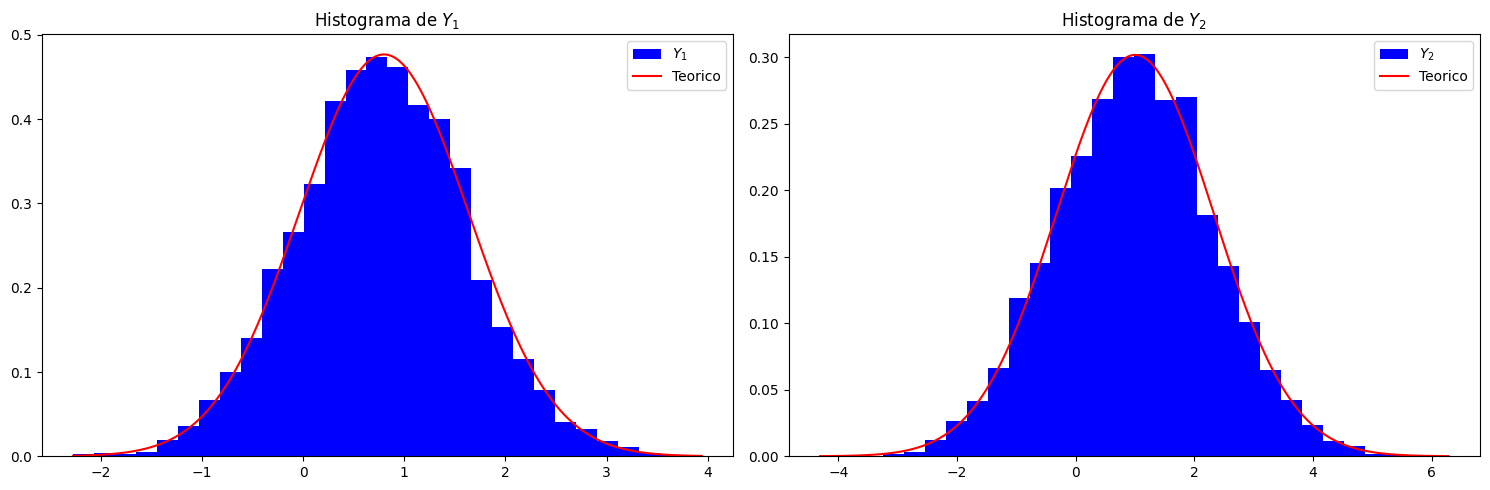

In [120]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import multivariate_normal, norm


bins = 30
C_y = [[0.7, 0.8],[0.8, 1.75]] #Matriz de covarianza de Y
mu_y = [0.8, 1.0] #vector de medias de Y 

# Descomposición espectral de C_Y
d, v = np.linalg.eigh(C_y) #d=autovalores, v=autovectores
D_sqrt = np.diag(np.sqrt(d))

# Calcular A = C_Y^{1/2} = v*d*v^t
A = v @ D_sqrt @ v.T # @ se comporta como la funcion 'dot'
#print(A)

#u = mu_y 
u = np.array(mu_y).reshape(2, 1) 

N = 5000
Z_1 = np.random.normal(0,1,N)  # Z_1~N(0,1)
Z_2 = np.random.normal(0,1,N) # Z_2~N(0,1)
Z = np.array([Z_1, Z_2]) # Z = [Z_1 Z_2]^T 

mu_Z = [0, 0] #vector de medias de Z
C_Z = [[1, 0], [0, 1]] #matriz de covarianza de Z

Y = np.dot(A,Z) + u #transformación lineal Y=f

uy = u #E[Y] = A * E[Z] + u
#print(uy)
Cy = A @ C_Z @ A.T #var(Y) = A * var(Z) * A^T
#print(Cy)

# Separar componentes de Y
Y_1 = Y[0, :]  # Primera fila (Y_1)
Y_2 = Y[1, :]  # Segunda fila (Y_2)

#Ejes x para cada histograma y funcion de densidad
eje_x1 = np.linspace(np.min(Y_1), np.max(Y_1),N)
eje_x2 = np.linspace(np.min(Y_2), np.max(Y_2),N)

#Densidad teorica
y_pdf_1 = norm.pdf(eje_x1, uy[0], np.sqrt(Cy[0][0])) # y ~ N(0.8,0.7)
y_pdf_2 = norm.pdf(eje_x2, uy[1], np.sqrt(Cy[1][1])) # y ~ N(1.75,1)

# Histograma de Y_1
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(Y_1, bins, density=True, color='b', label='$Y_1$')
plt.plot(eje_x1, y_pdf_1,color='r', label = 'Teorico')
plt.title('Histograma de $Y_1$')
plt.legend()

plt.subplot(1,2,2)
plt.hist(Y_2, bins, density=True, color='b', label='$Y_2$')
plt.plot(eje_x2, y_pdf_2,color='r', label = 'Teorico')
plt.title('Histograma de $Y_2$')
plt.legend()

plt.tight_layout()
plt.show()


3. Con los parámetros de la transformación, A y u, genere 5000 realizaciones de la variable Y
transformando las muestras del vector Z. Para el vector Y resultante, Grafique el histograma
de cada componente y las curvas de nivel con la dispersión de puntos de Y superpuesta.

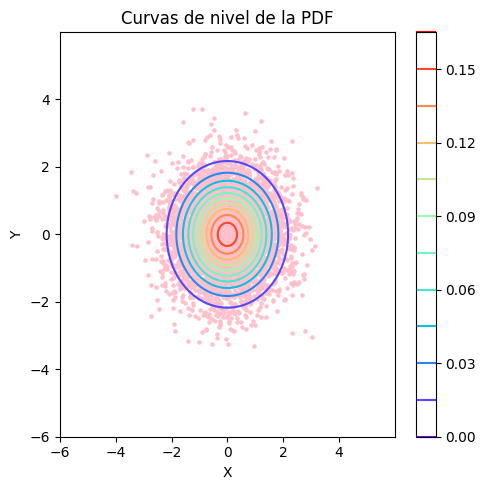

In [124]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import multivariate_normal, norm

C_y = [[0.7, 0.8],[0.8, 1.75]] #Matriz de covarianza de Y
mu_y = [0.8, 1.0] #vector de medias de Y 

# Descomposición espectral de C_Y
d, v = np.linalg.eigh(C_y) #d=autovalores, v=autovectores
D_sqrt = np.diag(np.sqrt(d))

# Calcular A = C_Y^{1/2} = v*d*v^t
A = v @ D_sqrt @ v.T # @ se comporta como la funcion 'dot'
#print(A)

#u = mu_y 
u = np.array(mu_y).reshape(2, 1) 

N = 5000
Z_1 = np.random.normal(0,1,N)  # Z_1~N(0,1)
Z_2 = np.random.normal(0,1,N) # Z_2~N(0,1)
Z = np.array([Z_1, Z_2]) # Z = [Z_1 Z_2]^T 

mu_Z = [0, 0] #vector de medias de Z
C_Z = [[1, 0], [0, 1]] #matriz de covarianza de Z

Y = np.dot(A, Z) + u #transformación lineal Y=f

uy = u #E[Y] = A * E[Z] + u
#print(uy)
Cy = A @ C_Z @ A.T #var(Y) = A * var(Z) * A^T
#print(Cy)

# Graficar las curvas de nivel
fig, ax2 = plt.subplots(figsize=(5, 5))
contour = ax2.contour(x, y, z, levels=10, cmap='rainbow')
ax2.set_title('Curvas de nivel de la PDF')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(contour, ax=ax2)
plt.scatter(Z_1, Z_2, color = 'pink',s = 5) #Gráfico de dispersión

plt.tight_layout()
plt.show()

Una transformación lineal de una variable aleatoria con distribución estandar produce otra variable con distribución estandar. Además la descomposición espectral de la nueva variable sirve para hacer esta transformación, adaptándose perfectamente a la distribución. El gráfico de dispersió sobre las curvas de nivel muestra que las variables se distribuyen sobre estas mayormente.